# Homework 5. Solution

Set up the environment.

In [1]:
import re

import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('float_format', '{:6.2f}'.format)
sns.set_context('talk')
%matplotlib inline

## Q1

Visualize centered and standardized Log-Gamma distribution. An example is given below.

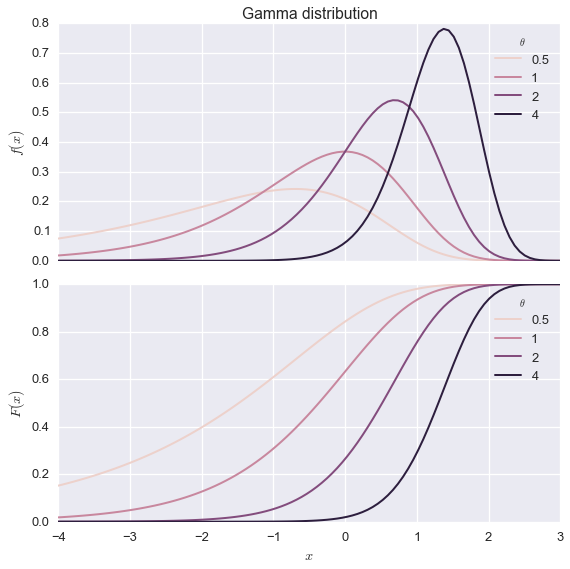

In [2]:
grid = np.linspace(-4, 3, 100)
grid_param = [.5, 1, 2, 4]

sns.set_palette(sns.cubehelix_palette(len(grid_param), start=0))
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)
for param in grid_param:
    pdf = scs.loggamma.pdf(grid, param)
    cdf = scs.loggamma.cdf(grid, param)
    axes[0].plot(grid, pdf, label=param, lw=2)
    axes[1].plot(grid, cdf, label=param, lw=2)
axes[0].set_title('Gamma distribution')
axes[0].legend(title=r'$\theta$')
axes[1].legend(title=r'$\theta$')
axes[1].set_xlabel(r'$x$')
axes[0].set_ylabel(r'$f(x)$')
axes[1].set_ylabel(r'$F(x)$')
plt.tight_layout()
plt.show()

## Q2

Vizualize characteristics of Russian companies.

### Q2.1

- Read the data from Excel file into Pandas DataFrame.

In [3]:
raw = pd.read_excel('../data/Ruslana_subset.xls', na_values=['n.a.'])

print(raw.shape)
print(raw.dtypes)

WARNING *** file size (17773997) not 512 + multiple of sector size (512)
(15000, 65)
Company Name                                   object
National\nIdentification number (OKPO/NIN)      int64
Postcode                                       object
OKVED, primary code                             int64
Number of Employees\n2011                     float64
Number of Employees\n2010                     float64
Number of Employees\n2009                     float64
Number of Employees\n2008                     float64
Number of Employees\n2007                     float64
Number of Employees\n2006                     float64
Number of Employees\n2005                     float64
Number of Employees\n2004                     float64
Number of Employees\n2003                     float64
Number of Employees\n2002                     float64
Total Assets\nth USD\n2011                    float64
Total Assets\nth USD\n2010                    float64
Total Assets\nth USD\n2009                    float

### Q2.2

- Replace newline symbol ('\n') with a space.
- Rename 'Company Name' to 'CoName', 'National Identification number (OKPO/NIN)' to 'NID', and 'OKVED, primary code' to 'OKVED'.

In [4]:
data0 = raw.copy()
data0.columns = [re.sub(r'\n', ' ', x) for x in data0.columns]
data0.rename(columns={'Company Name': 'CoName',
                      'National Identification number (OKPO/NIN)': 'NID',
                      'OKVED, primary code': 'OKVED'},
            inplace=True)

print(data0.columns)

Index(['CoName', 'NID', 'Postcode', 'OKVED', 'Number of Employees 2011',
       'Number of Employees 2010', 'Number of Employees 2009',
       'Number of Employees 2008', 'Number of Employees 2007',
       'Number of Employees 2006', 'Number of Employees 2005',
       'Number of Employees 2004', 'Number of Employees 2003',
       'Number of Employees 2002', 'Total Assets th USD 2011',
       'Total Assets th USD 2010', 'Total Assets th USD 2009',
       'Total Assets th USD 2008', 'Total Assets th USD 2007',
       'Total Assets th USD 2006', 'Total Assets th USD 2005',
       'Total Assets th USD 2004', 'Total Assets th USD 2003',
       'Total Assets th USD 2002', 'Op. Revenue (Turnover) th USD 2011',
       'Op. Revenue (Turnover) th USD 2010',
       'Op. Revenue (Turnover) th USD 2009',
       'Op. Revenue (Turnover) th USD 2008',
       'Op. Revenue (Turnover) th USD 2007',
       'Op. Revenue (Turnover) th USD 2006',
       'Op. Revenue (Turnover) th USD 2005',
       'Op. Reven

### Q2.3

- Set index for the dataset which consists of ['Company Name', 'National Identification number (OKPO/NIN)', 'Postcode', 'OKVED, primary code', 'Region']

In [5]:
data1 = data0.copy()
index = list(data1.columns[:4])
index.append(data1.columns[-1])

print(index)

data1.set_index(index, inplace=True)
data1.sort_index(inplace=True)

print(data1.columns)

['CoName', 'NID', 'Postcode', 'OKVED', 'Region']
Index(['Number of Employees 2011', 'Number of Employees 2010',
       'Number of Employees 2009', 'Number of Employees 2008',
       'Number of Employees 2007', 'Number of Employees 2006',
       'Number of Employees 2005', 'Number of Employees 2004',
       'Number of Employees 2003', 'Number of Employees 2002',
       'Total Assets th USD 2011', 'Total Assets th USD 2010',
       'Total Assets th USD 2009', 'Total Assets th USD 2008',
       'Total Assets th USD 2007', 'Total Assets th USD 2006',
       'Total Assets th USD 2005', 'Total Assets th USD 2004',
       'Total Assets th USD 2003', 'Total Assets th USD 2002',
       'Op. Revenue (Turnover) th USD 2011',
       'Op. Revenue (Turnover) th USD 2010',
       'Op. Revenue (Turnover) th USD 2009',
       'Op. Revenue (Turnover) th USD 2008',
       'Op. Revenue (Turnover) th USD 2007',
       'Op. Revenue (Turnover) th USD 2006',
       'Op. Revenue (Turnover) th USD 2005',
      

### Q2.4

- Separate year and firm characteristic in the column names.
- Convert column names to two-level column MultiIndex.
- Year must be to 'datetime' type.

In [6]:
data2 = data1.copy()
cols = [(x[:-5], pd.to_datetime((x[-4:]))) for x in data2.columns]
data2.columns = pd.MultiIndex.from_tuples(cols, names=['Value', 'Year'])

print(data2.columns)

MultiIndex(levels=[['Cost of Goods Sold th USD', 'Fixed Assets th USD', 'Gross Profit th USD', 'Number of Employees', 'Op. Revenue (Turnover) th USD', 'Total Assets th USD'], [2002-01-01 00:00:00, 2003-01-01 00:00:00, 2004-01-01 00:00:00, 2005-01-01 00:00:00, 2006-01-01 00:00:00, 2007-01-01 00:00:00, 2008-01-01 00:00:00, 2009-01-01 00:00:00, 2010-01-01 00:00:00, 2011-01-01 00:00:00]],
           labels=[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]],
           names=['Value', 'Year'])


### Q2.5

- Move (stack) 'Year' to row index. Leave only firm characteristics as columns.

In [7]:
data3 = data2.stack('Year')

print(data3.head())

Value                                                    Cost of Goods Sold th USD  \
CoName NID     Postcode OKVED  Region        Year                                    
NaN    5793979 443090   112000 Samara Region 2002-01-01                   32234.58   
                                             2003-01-01                   38552.73   
                                             2004-01-01                   48809.08   
                                             2005-01-01                   64005.63   
                                             2006-01-01                   91426.80   

Value                                                    Fixed Assets th USD  \
CoName NID     Postcode OKVED  Region        Year                              
NaN    5793979 443090   112000 Samara Region 2002-01-01              5748.96   
                                             2003-01-01              7155.04   
                                             2004-01-01              9971.64 

### Q2.6

- Extract the subset corresponding to the latest year in the dataset and only 'Number of Employees' column.
- Drop rows with missing values. Compute logarithm.

In [8]:
employees = data3['Number of Employees'].dropna().apply(np.log)
employees = employees.sort_index()
employees.name = 'Log(Number of Employees)'

subset = employees.xs('2011-01-01', level='Year')

print(subset.head())

CoName                      NID       Postcode  OKVED   Region              
1S                          68000224  101000    722000  Moscow                   5.56
AIRPORT KOLTSOVO            1130785   620025    632310  Sverdlovsk Region        7.70
ALBAZINO RESOURCES LTD      77269965  680000    132041  Khabarovsk Territory     5.56
ALFAKAR                     66266403  355035    501020  Stavropol Territory      2.71
ALMAZ SHIPBUILDING COMPANY  7510253   197110    351110  Saint Petersburg         6.80
Name: Log(Number of Employees), dtype: float64


### Q2.7

- Plot the distribution of 'Log(Number of Employees)' for the latest year.

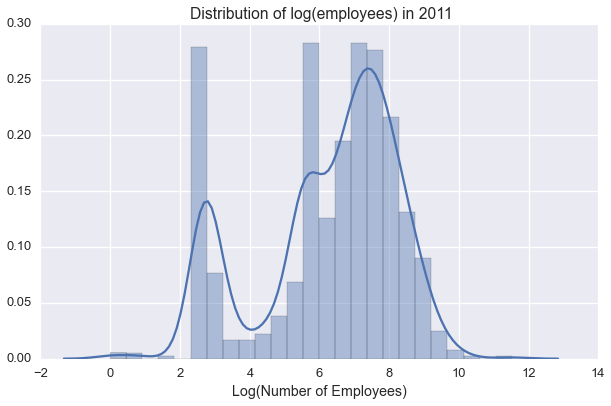

In [9]:
sns.set_palette('deep')
plt.figure(figsize=(10, 6))
sns.distplot(subset)
plt.title('Distribution of log(employees) in 2011')
plt.show()

### Q2.8

- Extract the subset from 'Log(Number of Employees)' series that corresponds to regions in ['Moscow', 'Saint Petersburg', 'Novosibirsk  Region'] and all years.

In [10]:
regions = ['Moscow', 'Saint Petersburg', 'Novosibirsk  Region']
subset = employees.loc(axis=0)[pd.IndexSlice[:, :, :, :, regions, '2011-01-01']]

print(subset.head())

CoName                      NID       Postcode  OKVED   Region            Year      
1S                          68000224  101000    722000  Moscow            2011-01-01     5.56
ALMAZ SHIPBUILDING COMPANY  7510253   197110    351110  Saint Petersburg  2011-01-01     6.80
ARMALIT-1, INC.             52200205  198097    291300  Saint Petersburg  2011-01-01     6.53
ATLANT-KR                   66813584  129110    652310  Moscow            2011-01-01     2.77
AVRORA-2000                 83886308  188512    652000  Saint Petersburg  2011-01-01     2.77
Name: Log(Number of Employees), dtype: float64


### Q2.9

- Plot distributions of 'Log(Number of Employees)' for each region on the same figure.

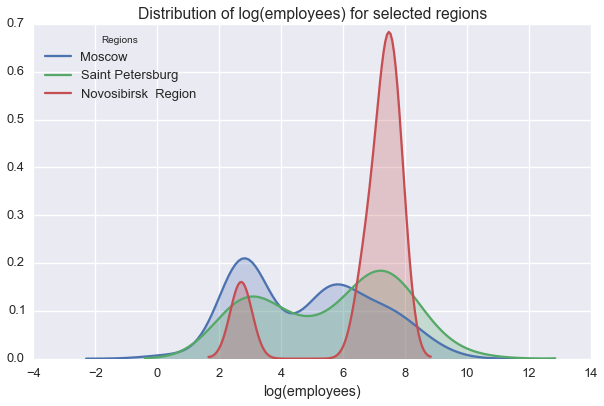

In [11]:
plt.figure(figsize=(10, 6))
for region in regions:
    sns.kdeplot(subset.xs(region, level='Region'), label=region, shade=True)
plt.title('Distribution of log(employees) for selected regions')
plt.xlabel('log(employees)')
plt.legend(title='Regions', loc='upper left')
plt.show()

### Q2.10

- Plot a timeseries of average 'Log(Number of Employees)' for three regions chosen above.

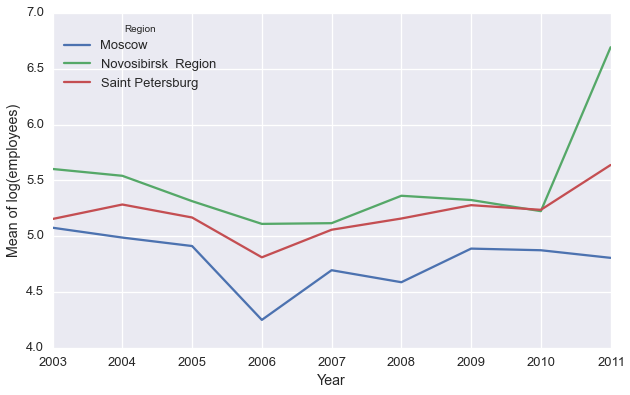

In [12]:
regions = ['Moscow', 'Saint Petersburg', 'Novosibirsk  Region']
subset = employees.loc(axis=0)[pd.IndexSlice[:, :, :, :, regions]]

df = subset.groupby(level=['Region', 'Year']).mean().unstack('Region')
df.plot(figsize=(10, 6))
plt.ylabel('Mean of log(employees)')
plt.show()

### Q2.11

- Subset 'Log(Number of Employees)' for Moscow only.
- Plot distribution for each year separately but on the same graph.

CoName  NID       Postcode  OKVED   Year      
NaN     40222779  107217    741310  2003-01-01     4.56
                                    2005-01-01     4.74
                                    2007-01-01     4.84
                                    2008-01-01     4.90
                                    2009-01-01     4.92
Name: Log(Number of Employees), dtype: float64


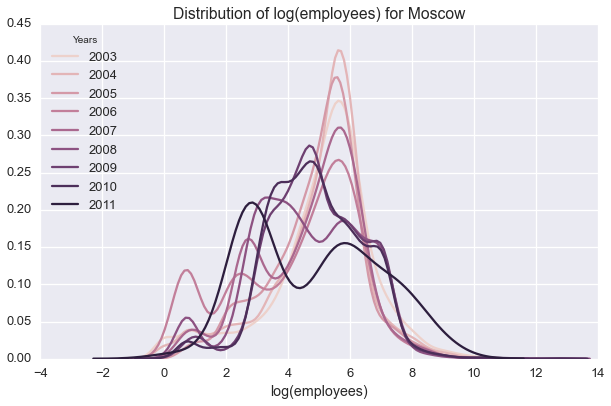

In [13]:
subset = employees.xs('Moscow', level='Region')
print(subset.head())

plt.figure(figsize=(10, 6))
years = subset.index.get_level_values('Year').unique()
sns.set_palette(sns.cubehelix_palette(len(years), start=0))
for year in sorted(years):
    sns.kdeplot(subset.xs(year, level='Year'), label=year.year, shade=False)
plt.title('Distribution of log(employees) for Moscow')
plt.xlabel('log(employees)')
plt.legend(title='Years', loc='upper left')
plt.show()

### Q2.12

- Compute 'Log(Profit per Employee)' and 'Log(Number of Employees)'.
- Drop missing and infinite values only in these columns.
- Print descriptive statistics for 'Log(Profit per Employee)' and 'Log(Number of Employees)'.

In [14]:
data4 = data3.copy()
data4['Profit per Employee'] = data4['Gross Profit th USD'] / data4['Number of Employees']
data4 = data4[data4['Profit per Employee'] > 0]
data4['Log(Profit per Employee)'] = data4['Profit per Employee'].apply(np.log)
data4['Log(Number of Employees)'] = data4['Number of Employees'].apply(np.log)
data4.dropna(subset=['Log(Profit per Employee)', 'Log(Number of Employees)'], inplace=True)

print(data4[['Log(Profit per Employee)', 'Log(Number of Employees)']].describe())

       Log(Profit per Employee)  Log(Number of Employees)
count                  62377.00                  62377.00
mean                       2.61                      5.35
std                        1.96                      1.57
min                       -9.15                      0.00
25%                        1.41                      4.34
50%                        2.54                      5.54
75%                        3.74                      6.34
max                       11.97                     13.81


### Q2.13

- Sample randomly from the dataset only 1000 observations. Vizualize dependence between 'Log(Profit per Employee)' and 'Log(Number of Employees)'. That is, plot:
    - scatter
    - linear regression line with confidence bands
    - densitites for both columns

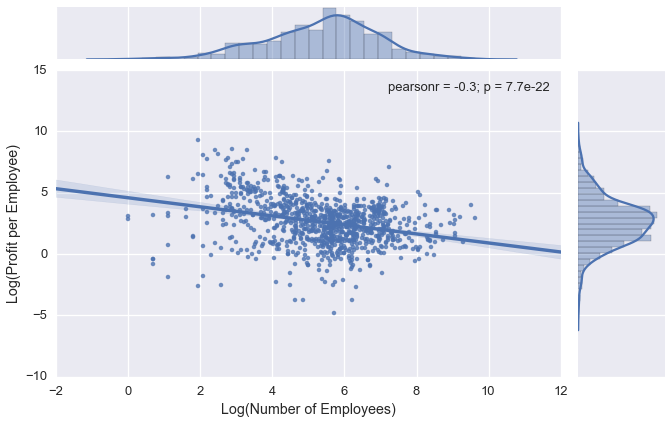

In [15]:
df = data4.sample(1000)

sns.set_palette('deep')
g = sns.jointplot(x='Log(Number of Employees)',
              y='Log(Profit per Employee)', data=df, kind='reg')
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.show()